In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
%matplotlib inline

In [124]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')
data = data.drop(['id'], axis=1)

KeyError: "['id'] not found in axis"

In [125]:
#General data info
data.head()

,Unnamed: 0,CPU,throughput
0,0,0.086533,53944.552923
1,1,0.371612,205391.305736
2,2,0.422462,229052.799465
3,3,0.927690,426609.578099
4,4,0.134591,82076.892799


In [126]:
data.describe()

,Unnamed: 0,CPU,throughput
count,3000.000000,3000.000000,3000.000000
mean,1499.500000,0.498745,250457.215133
std,866.169729,0.289299,129052.354082
min,0.000000,0.000165,107.491407
25%,749.750000,0.247543,143764.278308
50%,1499.500000,0.502997,264849.865485
75%,2249.250000,0.750333,363874.003016
max,2999.000000,0.999931,450523.248169


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
Unnamed: 0    3000 non-null int64
CPU           3000 non-null float64
throughput    3000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


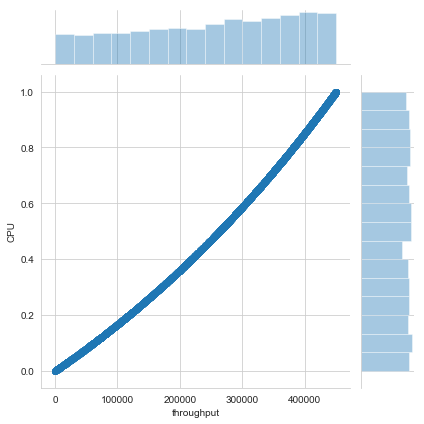

In [128]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


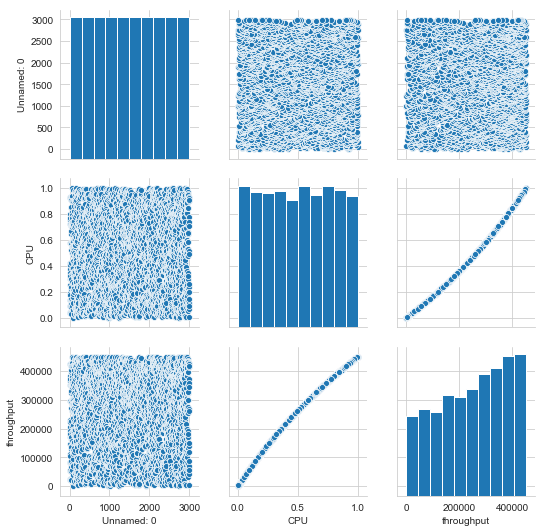

In [129]:
sns.pairplot(data)


In [130]:
data['throughput'].corr(data['CPU'])


0.9960858432797405

In [131]:
datalm = data


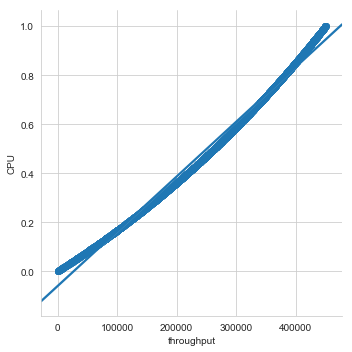

In [132]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [133]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [134]:
print(lm.coef_)


[2.23072609e-06]


In [135]:
#Test data prediction
prediction = lm.predict(X_test)
X_test = np.array(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Throuput':X_test.flatten(),'Actual_CPU': y_test.flatten(), 'Predicted_CPU': prediction.flatten()})
df

,Throuput,Actual_CPU,Predicted_CPU
0,136146.734116,0.233008,0.243736
1,434621.682863,0.951598,0.909551
2,427362.774437,0.929925,0.893359
3,200382.540839,0.361083,0.387028
4,352825.010106,0.720832,0.727086
5,21337.626370,0.033372,-0.012372
6,280093.130591,0.538661,0.564841
7,436814.758591,0.958194,0.914444
8,203014.550372,0.366606,0.392899
9,282235.656428,0.543741,0.569620


Text(0, 0.5, 'Predicted Y')

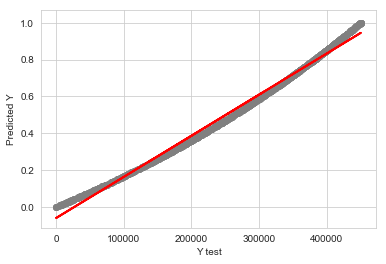

In [136]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


In [137]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.021821662805826793
MSE: 0.0006384698304763662
RMSE: 0.025267960552374746


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


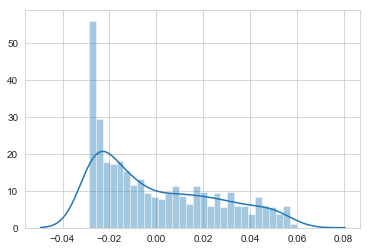

In [138]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [139]:
# save the model to disk
filename = '../models/linearReg_model.sav'
pickle.dump(lm, open(filename, 'wb'))

In [143]:
lm.predict([[100000]])

array([0.16310217])